# An example using MNIST Fashion


## Start Coding

Let's start with our import of TensorFlow

In [1]:
import tensorflow as tf

The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [2]:
fash_mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [3]:
(training_images, training_labels), (test_images, test_labels) = fash_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
training_images.shape

(60000, 28, 28)

What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

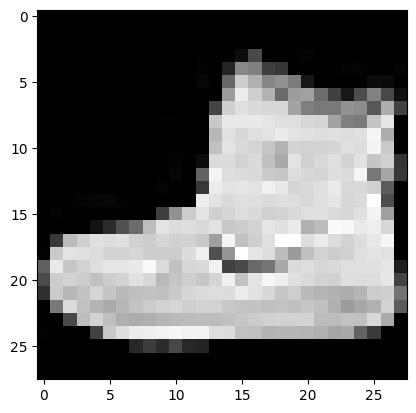

In [5]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt

print(training_labels[0])
print(training_images[0])

plt.imshow(training_images[0], cmap='gray')

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [6]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. 

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [8]:
model.compile(optimizer = tf.optimizers.SGD(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7493 - accuracy: 0.7595
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5118 - accuracy: 0.8285
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4660 - accuracy: 0.8406
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4403 - accuracy: 0.8485
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4221 - accuracy: 0.8541


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate. It will report back the loss and the accuracy. Let's give it a try:

In [9]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4428 - accuracy: 0.8453


[0.4427948296070099, 0.845300018787384]

#### Model summary

To have a summary of the model architecture, you can use "model.summary()"

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# common code
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images  = training_images / 255.0
test_images = test_images / 255.0

# To do 

- "Play" with the model: Try different values/configurations of the hyper-parameters and keep track of the obtained results.
- Introduce the validation set: 15 % of the training dataset: by adding parameter 'validation_split=0.15'to the function 'model.fit'

### Report the obtained performance here:

##### 10 epochs => 
- Train accuracy = 0.8678
- Validation acc = 0.8573
- Test acc = 0.8509

##### 15 epochs => 
- Train accuracy = 0.8791
- Validation acc = 0.8669
- Test acc = 0.8576

Epoch 1/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.7674 - accuracy: 0.7517 - val_loss: 0.6011 - val_accuracy: 0.7821
Epoch 2/15
1594/1594 [==============================] - 4s 2ms/step - loss: 0.5235 - accuracy: 0.8213 - val_loss: 0.5151 - val_accuracy: 0.8198
Epoch 3/15
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4777 - accuracy: 0.8359 - val_loss: 0.4895 - val_accuracy: 0.8254
Epoch 4/15
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4503 - accuracy: 0.8438 - val_loss: 0.4482 - val_accuracy: 0.8464
Epoch 5/15
1594/1594 [==============================] - 4s 2ms/step - loss: 0.4321 - accuracy: 0.8507 - val_loss: 0.4389 - val_accuracy: 0.8497
Epoch 6/15
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4175 - accuracy: 0.8554 - val_loss: 0.4301 - val_accuracy: 0.8487
Epoch 7/15
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4059 - accuracy: 0.8588 - val_loss: 0.4355 - val_accuracy:

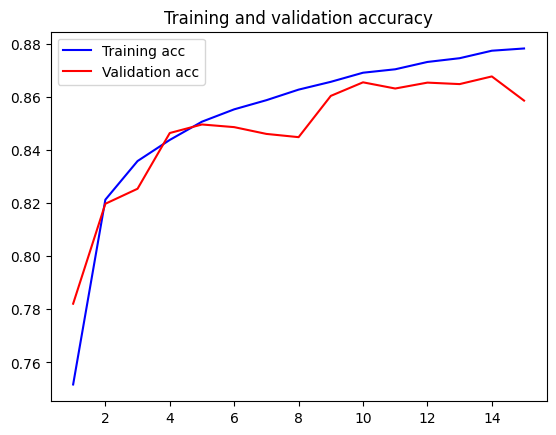

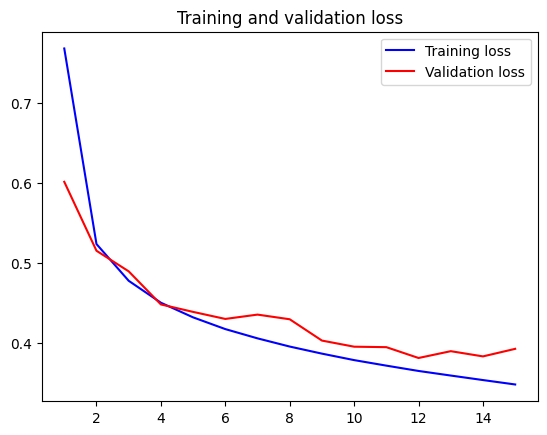

In [15]:
# Exp 1

# Here, we work with a two-layer NN.
# Learning is performed using SGD, with a learning rate of 0.01 and momentum = 0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.01, momentum=0.0),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, validation_split=0.15, shuffle=True, epochs=15)

model.summary()

model.evaluate(test_images, test_labels)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# To do 

- Change the optimizer from 'SGD' to 'adam' in the function 'model.compile(...)'...

### Report the obtained performance here:

##### 15 epochs => 
- Train accuracy = 0.9243
- Validation acc = 0.8849
- Test acc = 0.8778

##### What do you think of the variance?
We've a pretty high variance which shows that our model is overfitting

Epoch 1/15
1594/1594 [==============================] - 6s 3ms/step - loss: 0.5137 - accuracy: 0.8212 - val_loss: 0.4311 - val_accuracy: 0.8448
Epoch 2/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3826 - accuracy: 0.8619 - val_loss: 0.3739 - val_accuracy: 0.8641
Epoch 3/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3416 - accuracy: 0.8768 - val_loss: 0.3740 - val_accuracy: 0.8659
Epoch 4/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3147 - accuracy: 0.8847 - val_loss: 0.3583 - val_accuracy: 0.8724
Epoch 5/15
1594/1594 [==============================] - 4s 3ms/step - loss: 0.2966 - accuracy: 0.8900 - val_loss: 0.3342 - val_accuracy: 0.8789
Epoch 6/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2828 - accuracy: 0.8967 - val_loss: 0.3247 - val_accuracy: 0.8862
Epoch 7/15
1594/1594 [==============================] - 4s 3ms/step - loss: 0.2708 - accuracy: 0.8990 - val_loss: 0.3351 - val_accuracy:

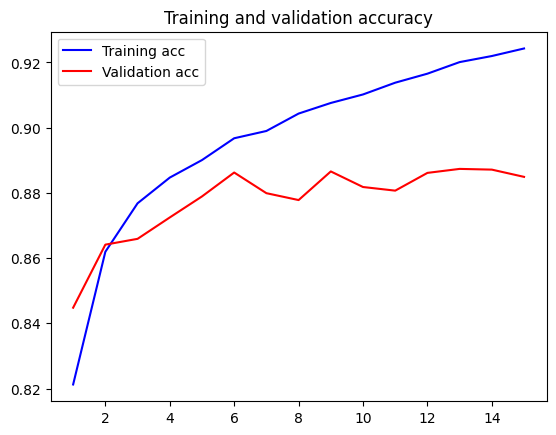

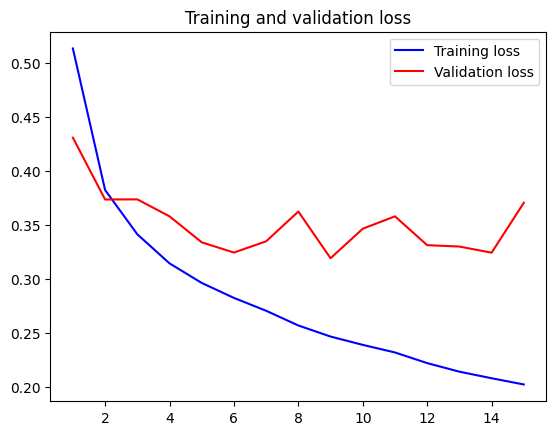

In [16]:
# Exp 2

# Change the optimizer from 'SGD' to 'adam' in the function 'model.compile(...)'...

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, validation_split=0.15, shuffle=True, epochs=15)

model.summary()

model.evaluate(test_images, test_labels)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# To do 

- In the previous experiment, we can notice a high variance.
- Use dropout to fix the problem. You can add layer "tf.keras.layers.Dropout(0.2)" before the hidden layer.

### Report the obtained performance here:

##### 15 epochs => 
- Train accuracy = 0.8972
- Validation acc = 0.8834
- Test acc = 0.8751

##### Does the dropout fix the problem?
The dropout partially solves the problem. It's still not perfect, but our variance is much lower and has solved the overfitting issue.

Epoch 1/15
1594/1594 [==============================] - 6s 3ms/step - loss: 0.5521 - accuracy: 0.8047 - val_loss: 0.4546 - val_accuracy: 0.8354
Epoch 2/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4268 - accuracy: 0.8444 - val_loss: 0.4136 - val_accuracy: 0.8454
Epoch 3/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3855 - accuracy: 0.8584 - val_loss: 0.3703 - val_accuracy: 0.8709
Epoch 4/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3642 - accuracy: 0.8658 - val_loss: 0.3646 - val_accuracy: 0.8694
Epoch 5/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3451 - accuracy: 0.8721 - val_loss: 0.3453 - val_accuracy: 0.8797
Epoch 6/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3328 - accuracy: 0.8756 - val_loss: 0.3494 - val_accuracy: 0.8773
Epoch 7/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3213 - accuracy: 0.8801 - val_loss: 0.3322 - val_accuracy:

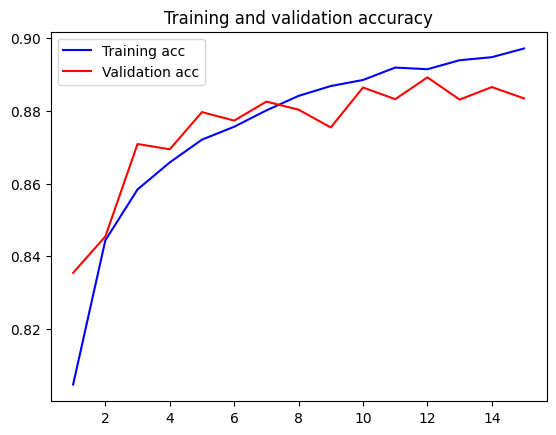

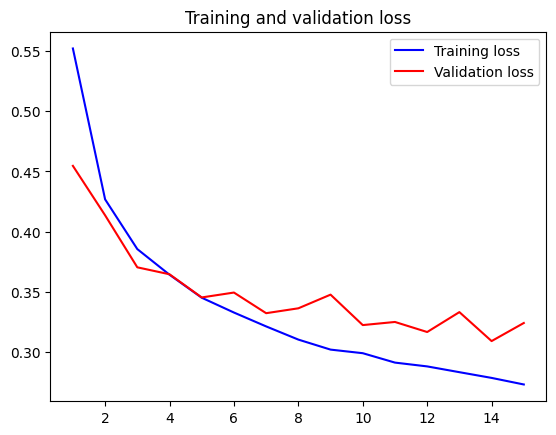

In [17]:
# Exp 3

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, validation_split=0.15, shuffle=True, epochs=15)

model.summary()

model.evaluate(test_images, test_labels)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# To do 

- In the previous experiment, we have fixed the overfitting problem using dropout. Let's try to improve the accuracy of the model.
- Increase the number of neurons in the hidden layer => 512, 1024

### Report the obtained performance here:

##### 15 epochs for "512 hidden neurons"=> 
- Train accuracy = 0.9047
- Validation acc = 0.8922
- Test acc = 0.8842

##### 15 epochs for "1024 hidden neurons"=> 
- Train accuracy = 0.9077
- Validation acc = 0.8838
- Test acc = 0.8792

##### Is it satisfying?
Yes, we've impoved the accuracy of our model. But using 1024 neurons is actually worse than 'just' 512.

Epoch 1/15
1594/1594 [==============================] - 17s 10ms/step - loss: 0.5160 - accuracy: 0.8133 - val_loss: 0.4085 - val_accuracy: 0.8493
Epoch 2/15
1594/1594 [==============================] - 15s 10ms/step - loss: 0.3996 - accuracy: 0.8529 - val_loss: 0.3716 - val_accuracy: 0.8647
Epoch 3/15
1594/1594 [==============================] - 16s 10ms/step - loss: 0.3645 - accuracy: 0.8640 - val_loss: 0.3483 - val_accuracy: 0.8733
Epoch 4/15
1594/1594 [==============================] - 16s 10ms/step - loss: 0.3405 - accuracy: 0.8732 - val_loss: 0.3486 - val_accuracy: 0.8732
Epoch 5/15
1594/1594 [==============================] - 16s 10ms/step - loss: 0.3247 - accuracy: 0.8799 - val_loss: 0.3325 - val_accuracy: 0.8783
Epoch 6/15
1594/1594 [==============================] - 16s 10ms/step - loss: 0.3104 - accuracy: 0.8848 - val_loss: 0.3190 - val_accuracy: 0.8854
Epoch 7/15
1594/1594 [==============================] - 16s 10ms/step - loss: 0.2994 - accuracy: 0.8861 - val_loss: 0.3234 -

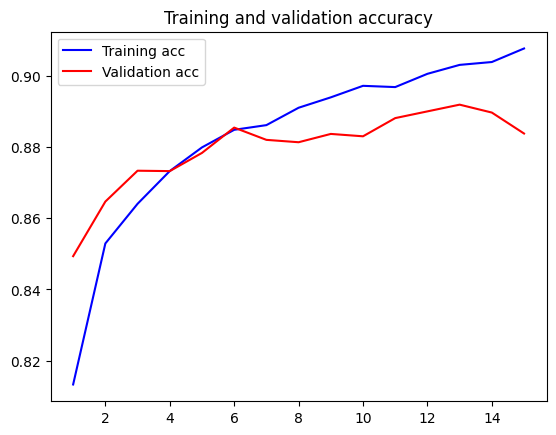

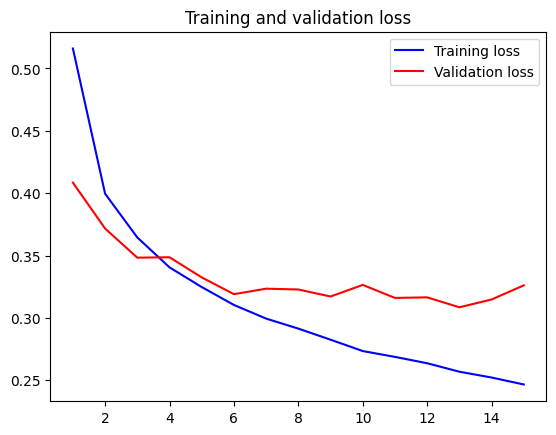

In [20]:
# Exp 4

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, validation_split=0.15, shuffle=True, epochs=15)

model.summary()

model.evaluate(test_images, test_labels)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 15 epochs => 
# Train accuracy = 0.90
# Validation acc = 0.89
# Test acc = 0.89


# To do 

- Let's try to improve the performance by adding another hidden layer.
- So, we wil use two hidden layers (512, 128). For each layer, use dropout with a rate of 0.2.

### Report the obtained performance here:

##### 15 epochs => 
- Train accuracy = 0.8925
- Validation acc = 0.8849
- Test acc = 0.8841

##### Is it satisfying?
We can't consider having a satisfying result. Our test accuracy is pratically the same. 

Epoch 1/15
1594/1594 [==============================] - 11s 6ms/step - loss: 0.5445 - accuracy: 0.8015 - val_loss: 0.4213 - val_accuracy: 0.8433
Epoch 2/15
1594/1594 [==============================] - 10s 6ms/step - loss: 0.4228 - accuracy: 0.8445 - val_loss: 0.3889 - val_accuracy: 0.8580
Epoch 3/15
1594/1594 [==============================] - 10s 6ms/step - loss: 0.3923 - accuracy: 0.8537 - val_loss: 0.3644 - val_accuracy: 0.8691
Epoch 4/15
1594/1594 [==============================] - 10s 6ms/step - loss: 0.3719 - accuracy: 0.8625 - val_loss: 0.3380 - val_accuracy: 0.8720
Epoch 5/15
1594/1594 [==============================] - 10s 6ms/step - loss: 0.3572 - accuracy: 0.8677 - val_loss: 0.3556 - val_accuracy: 0.8731
Epoch 6/15
1594/1594 [==============================] - 10s 6ms/step - loss: 0.3449 - accuracy: 0.8724 - val_loss: 0.3324 - val_accuracy: 0.8828
Epoch 7/15
1594/1594 [==============================] - 10s 6ms/step - loss: 0.3349 - accuracy: 0.8746 - val_loss: 0.3419 - val_ac

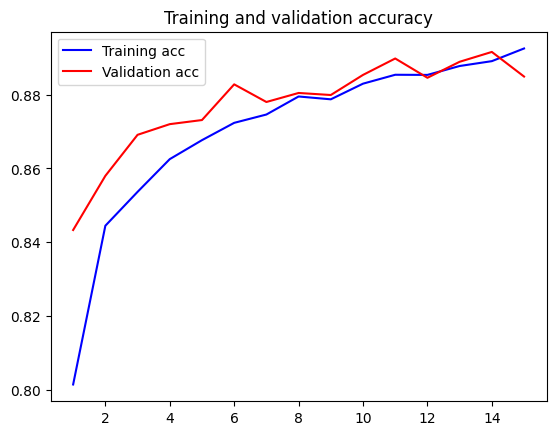

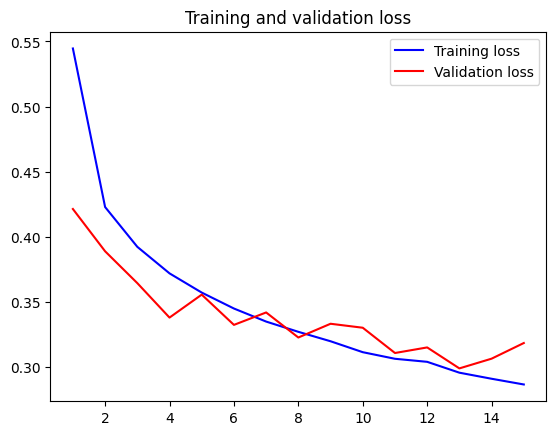

In [19]:
# Exp 5

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, validation_split=0.15, shuffle=True, epochs=15)

model.summary()

model.evaluate(test_images, test_labels)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# Final report
To improve our model, different hyper parameters can be used. What to use depends on what do we aim at (dropout if overfitting for exemple). Thanks to them, we can controle our model to get the best results for our data.